In [2]:
import statsmodels.api as sm
import seaborn as sns

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('Alcohol_Sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

DATE
1992-01-01    3459
1992-02-01    3458
1992-03-01    4002
1992-04-01    4564
1992-05-01    4221
Name: SALES, dtype: int64


In [3]:
series.plot()
pyplot.show()

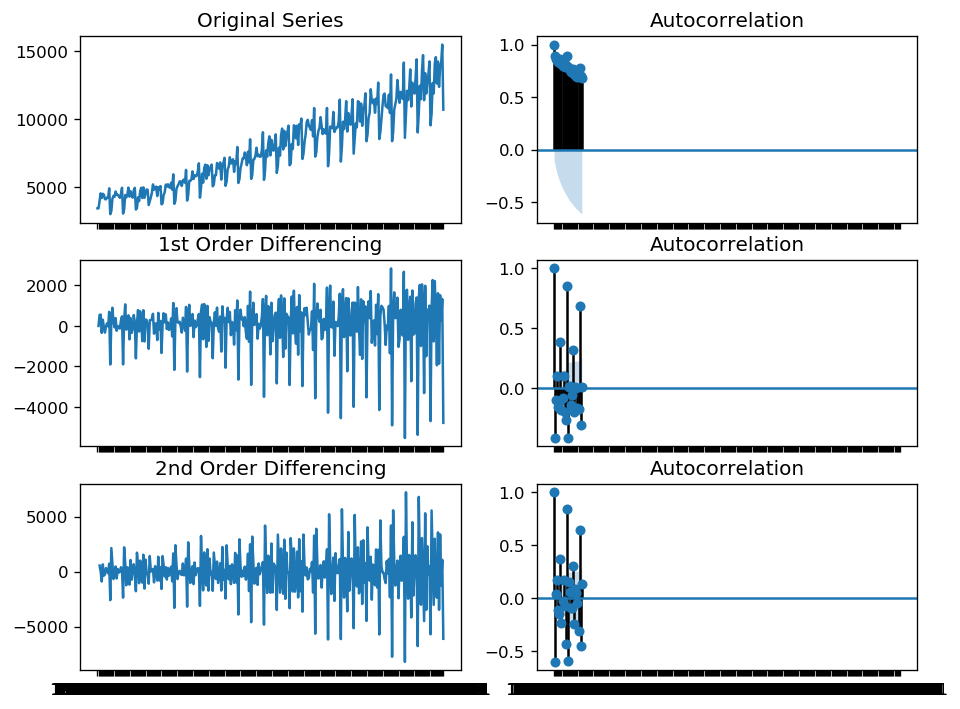

In [4]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('Alcohol_Sales.csv', names=['SALES'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.SALES); axes[0, 0].set_title('Original Series')
plot_acf(df.SALES, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.SALES.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.SALES.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.SALES.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.SALES.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

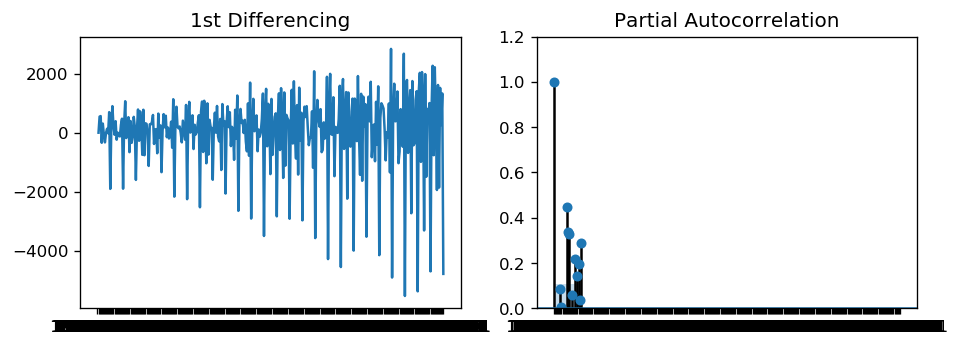

In [5]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.SALES.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_pacf(df.SALES.diff().dropna(), ax=axes[1])

plt.show()


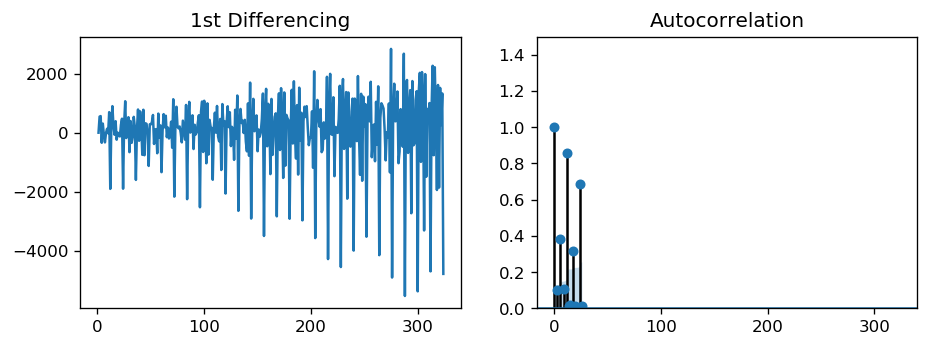

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('Alcohol_Sales.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.SALES.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.5))
plot_acf(df.SALES.diff().dropna(), ax=axes[1])

plt.show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(df.SALES, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Alit\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                  324
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2757.367
Method:                       css-mle   S.D. of innovations           1201.277
Date:                Mon, 06 Sep 2021   AIC                           5520.734
Time:                        01:44:10   BIC                           5532.077
Sample:                             1   HQIC                          5525.261
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.9425     46.753      0.576      0.564     -64.692     118.577
ar.L1.D.SALES    -0.4288      0.051     -8.355      0.000      -0.529      -0.328
                                    Root

In [8]:
# 0,1,1 ARIMA Model
model = ARIMA(df.SALES, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Alit\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                  324
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2695.820
Method:                       css-mle   S.D. of innovations            989.970
Date:                Mon, 06 Sep 2021   AIC                           5397.639
Time:                        01:46:54   BIC                           5408.982
Sample:                             1   HQIC                          5402.167
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.8604      2.549     11.322      0.000      23.864      33.857
ma.L1.D.SALES    -0.9570      0.015    -62.818      0.000      -0.987      -0.927
                                    Root

In [304]:
# 1,1,1 ARIMA Model
model = ARIMA(df.SALES, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.SALES   No. Observations:                  323
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -2734.043
Method:                       css-mle   S.D. of innovations           1134.562
Date:                Wed, 25 Aug 2021   AIC                           5478.086
Time:                        14:15:54   BIC                           5496.974
Sample:                             2   HQIC                          5485.626
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0309      0.356      0.087      0.931      -0.667       0.729
ar.L1.D2.SALES    -0.5687      0.054    -10.630      0.000      -0.674      -0.464
ar.L2.D2.SALES    -0.3362      0.053

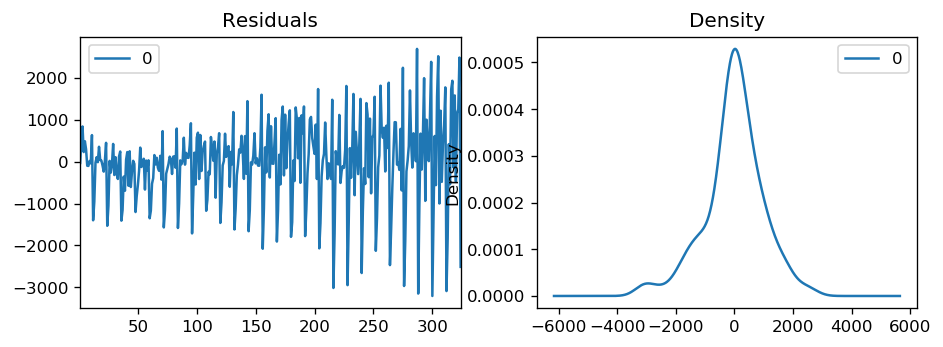

In [219]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

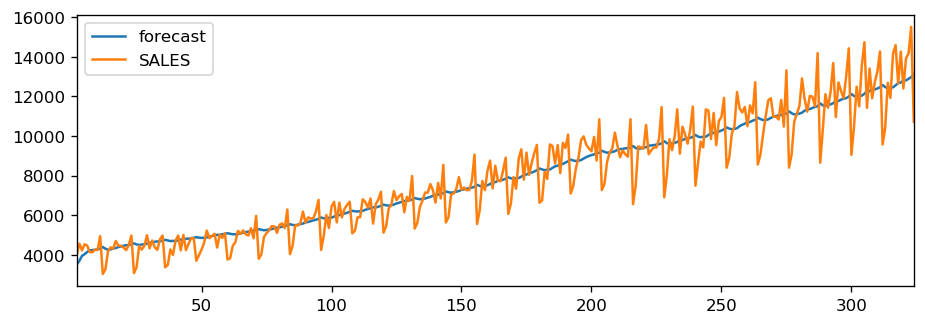

In [9]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [10]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.SALES[:85]
test = df.SALES[85:]

C:\Users\Alit\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                   84
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -647.742
Method:                       css-mle   S.D. of innovations            526.285
Date:                Mon, 06 Sep 2021   AIC                           1301.485
Time:                        12:18:06   BIC                           1308.777
Sample:                             1   HQIC                          1304.416
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.2906      2.327      6.142      0.000       9.731      18.851
ma.L1.D.SALES    -1.0000      0.038    -26.467      0.000      -1.074      -0.926
                                    Root

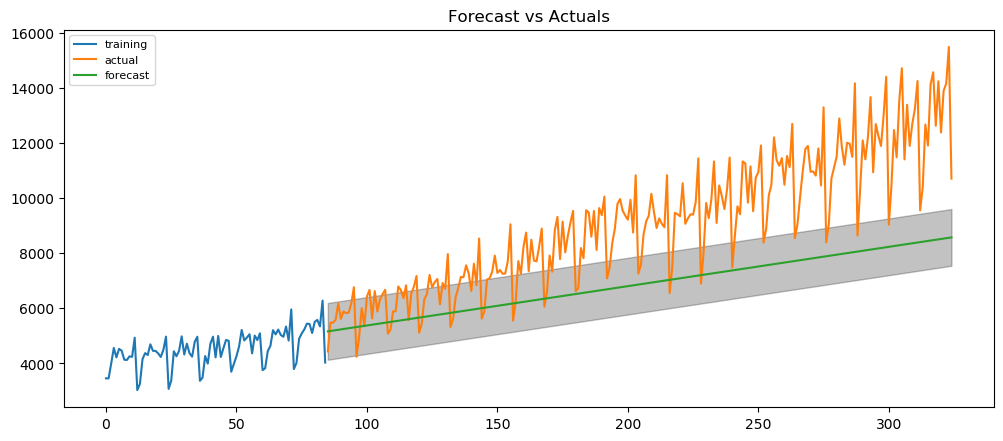

In [24]:
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(240, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.240)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)             
    mae = np.mean(np.abs(forecast - actual))    
    mpe = np.mean((forecast - actual)/actual)  
    rmse = np.mean((forecast - actual)**2)**.5 
    corr = np.corrcoef(forecast, actual)[0,1]  
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)            
    acf1 = acf(fc-test)[1]                    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Alit\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Alit\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


{'mape': 0.2245519002330609,
 'me': -2215.8324928681345,
 'mae': 2268.771486807439,
 'mpe': -0.21430459077463812,
 'rmse': 2742.6252996150515,
 'acf1': 0.5711573273430653,
 'corr': 0.8969675242667681,
 'minmax': 0.2240362087086002}